# DL - Multi Layer Lerceptron

## Part 1

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the MNIST dataset from TensorFlow
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Report the number and dimensions of training and test data
print(f'Training data shape: {x_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Test labels shape: {y_test.shape}')

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


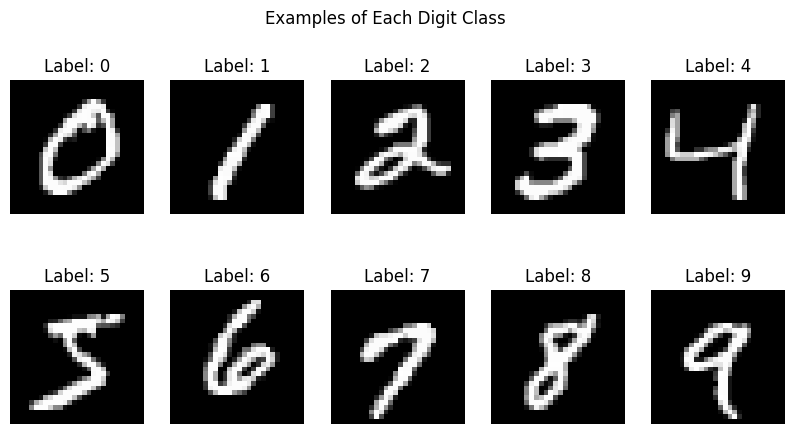

In [ ]:
# Display an instance of each class
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle('Examples of Each Digit Class')
for i in range(10):
    ax = axs[i // 5, i % 5]
    idx = np.where(y_train == i)[0][0]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Label: {i}')
    ax.axis('off')
plt.show()

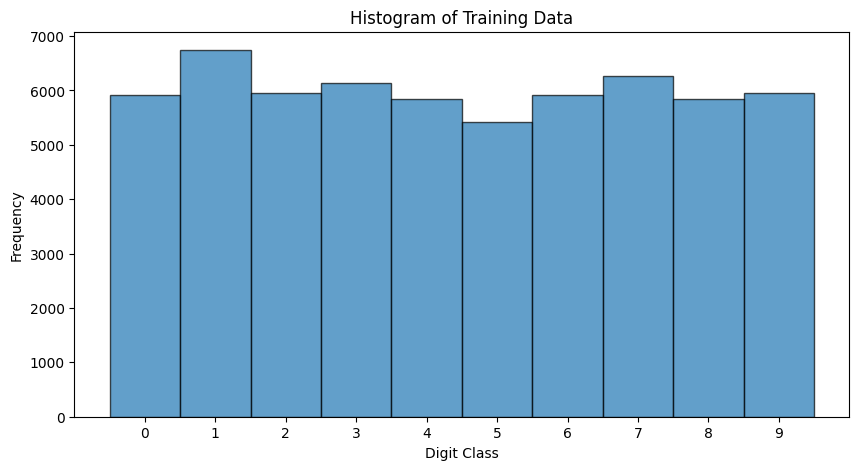

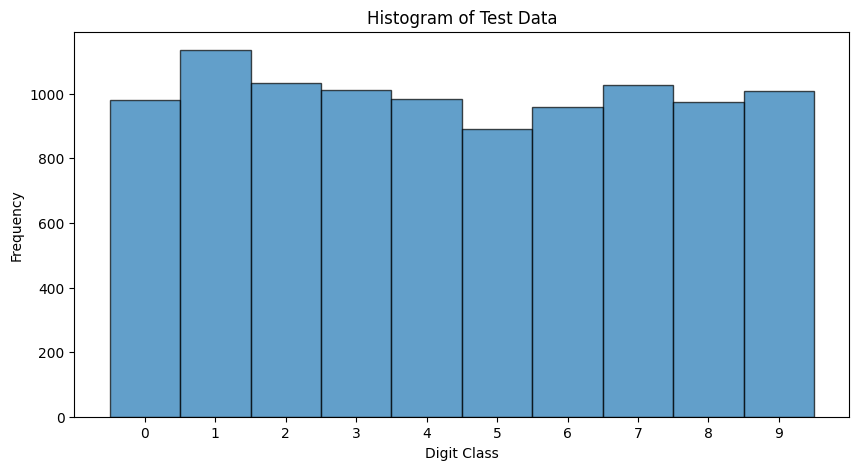

In [ ]:
# Draw a histogram of the number of samples of each class
def plot_histogram(labels, title):
    plt.figure(figsize=(10, 5))
    plt.hist(labels, bins=np.arange(11) - 0.5, edgecolor='black', alpha=0.7)
    plt.xticks(range(10))
    plt.xlabel('Digit Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

plot_histogram(y_train, 'Histogram of Training Data')
plot_histogram(y_test, 'Histogram of Test Data')

In [ ]:
# Scale the data to [1, 0] using max-min normalization
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

print(f'Scaled training data shape: {x_train_scaled.shape}')
print(f'Scaled test data shape: {x_test_scaled.shape}')

Scaled training data shape: (60000, 28, 28)
Scaled test data shape: (10000, 28, 28)


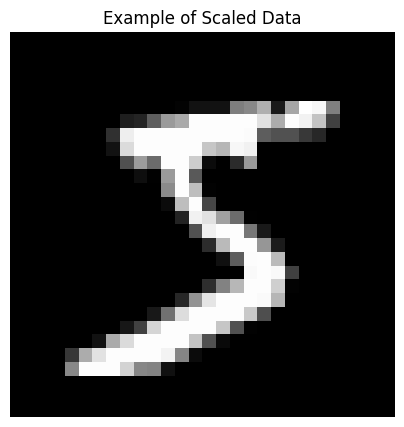

In [ ]:
# Display scaled data example
plt.figure(figsize=(5, 5))
plt.imshow(x_train_scaled[0], cmap='gray')
plt.title('Example of Scaled Data')
plt.axis('off')
plt.show()

## Part 2.1

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
#  Load the MNIST dataset from TensorFlow
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Normalize the data to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Define the MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2392 - accuracy: 0.9304 - val_loss: 0.1268 - val_accuracy: 0.9616
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1001 - accuracy: 0.9697 - val_loss: 0.0907 - val_accuracy: 0.9703
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0733 - accuracy: 0.9769 - val_loss: 0.0866 - val_accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0539 - accuracy: 0.9830 - val_loss: 0.0710 - val_accuracy: 0.9788
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0426 - accuracy: 0.9863 - val_loss: 0.0780 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0342 - accuracy: 0.9887 - val_loss: 0.1035 - val_accuracy: 0.9700
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.0865 - val_accuracy:

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0943 - accuracy: 0.9792 - 591ms/epoch - 2ms/step

Test accuracy: 0.979200005531311


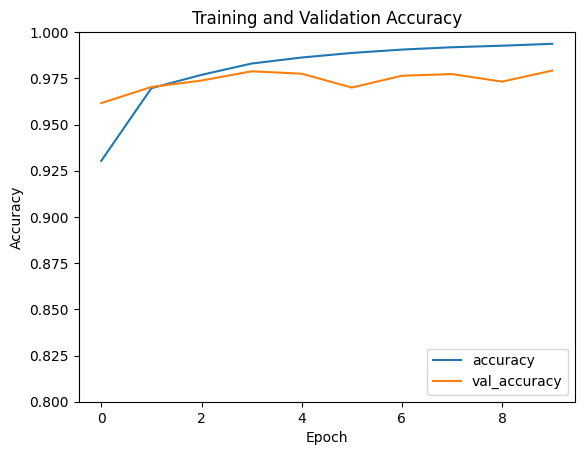

In [ ]:
# Plot the training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

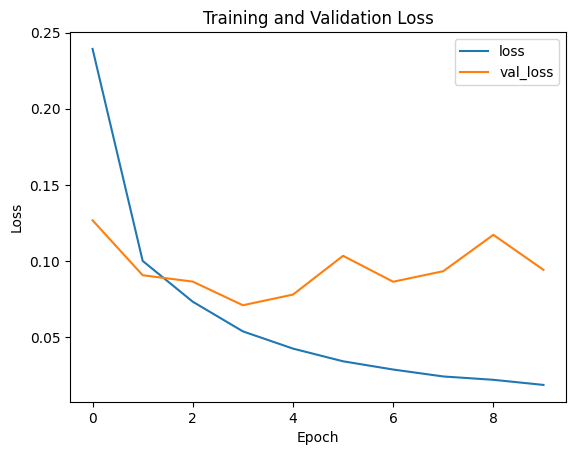

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Part 2.2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reduce training set size to 12,000 samples for this example
x_train = x_train[:12000]
y_train = y_train[:12000]

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Define the MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training and reporting per epoch
epochs = 5
batch_size = 200
num_batches_per_epoch = len(x_train) // batch_size

history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}

for epoch in range(epochs):
    print(f'\nEpoch {epoch + 1}/{epochs}')
    for batch in range(num_batches_per_epoch):
        x_batch = x_train[batch * batch_size: (batch + 1) * batch_size]
        y_batch = y_train[batch * batch_size: (batch + 1) * batch_size]
        loss, acc = model.train_on_batch(x_batch, y_batch)
        print(f'Batch {batch + 1}/{num_batches_per_epoch} - loss: {loss:.4f} - accuracy: {acc:.4f}')

    # Evaluate at the end of each epoch
    val_loss, val_acc = model.evaluate(x_test, y_test, verbose=2)
    history['loss'].append(loss)
    history['accuracy'].append(acc)
    history['val_loss'].append(val_loss)
    history['val_accuracy'].append(val_acc)
    print(f'Epoch {epoch + 1} - val_loss: {val_loss:.4f} - val_accuracy: {val_acc:.4f}')



Epoch 1/5
Batch 1/60 - loss: 2.2595 - accuracy: 0.1500
Batch 2/60 - loss: 2.1805 - accuracy: 0.1900
Batch 3/60 - loss: 2.1140 - accuracy: 0.2950
Batch 4/60 - loss: 2.0669 - accuracy: 0.3700
Batch 5/60 - loss: 1.9542 - accuracy: 0.4700
Batch 6/60 - loss: 1.9347 - accuracy: 0.5000
Batch 7/60 - loss: 1.7875 - accuracy: 0.5100
Batch 8/60 - loss: 1.7478 - accuracy: 0.5800
Batch 9/60 - loss: 1.6051 - accuracy: 0.7050
Batch 10/60 - loss: 1.4940 - accuracy: 0.7000
Batch 11/60 - loss: 1.3872 - accuracy: 0.7200
Batch 12/60 - loss: 1.3824 - accuracy: 0.6800
Batch 13/60 - loss: 1.2680 - accuracy: 0.7550
Batch 14/60 - loss: 1.1942 - accuracy: 0.7150
Batch 15/60 - loss: 1.0834 - accuracy: 0.7700
Batch 16/60 - loss: 1.1892 - accuracy: 0.6850
Batch 17/60 - loss: 1.1110 - accuracy: 0.7300
Batch 18/60 - loss: 1.0209 - accuracy: 0.7450
Batch 19/60 - loss: 0.8634 - accuracy: 0.8300
Batch 20/60 - loss: 0.8565 - accuracy: 0.7800
Batch 21/60 - loss: 0.8463 - accuracy: 0.7850
Batch 22/60 - loss: 0.7843 - acc

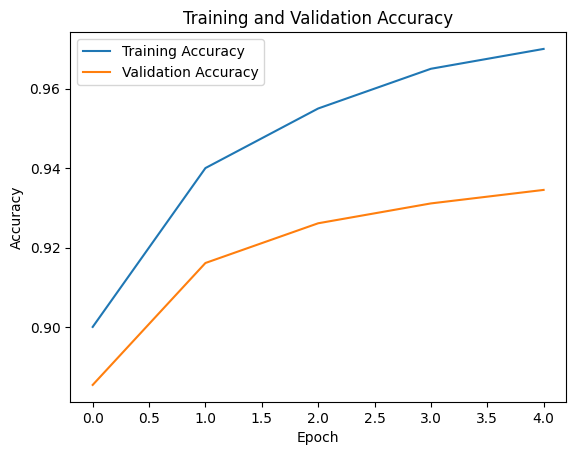

In [ ]:
# Plot training and validation accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

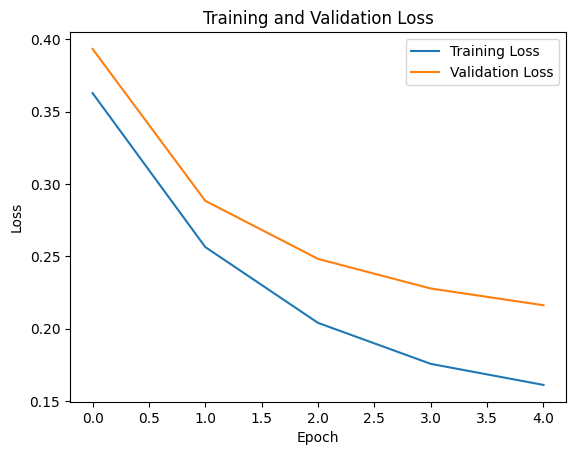

In [ ]:
# Plot training and validation loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()